In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
air_data_initial = pd.read_excel("C:/Users/SAI/OneDrive/Desktop/EXeclr/ExcelR_Assignments_Due/AIRLINES_DATA.xlsx")
air_data_initial.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [7]:
air_data_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
#EDA: Treat duplicates
air_data_initial[air_data_initial.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [9]:
#EDA: Missing values
air_data_initial.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

No duplicates and missing data

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [19]:
 air_data= norm_func(air_data_initial.iloc[:,1:])

# Hierarchical clustering :

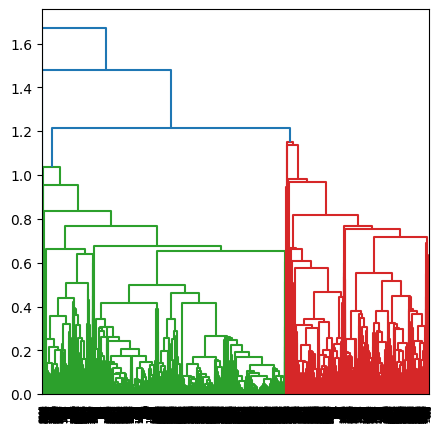

In [20]:
# Dendrogram
plt.figure(figsize = (5, 5));
dendrogram = sch.dendrogram(sch.linkage(air_data, method='average'))

In [28]:
agc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'average')
clu = agc.fit_predict(air_data_initial)
Clusters=pd.DataFrame(clu,columns=['Clusters'])
#Add clusters column to the existing data

air_data_Final = pd.concat([air_data_initial,Clusters], axis=1)
air_data_Final

C:\Anaconda\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,6
1,2,19244,0,1,1,1,215,2,0,0,6968,0,6
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,6
3,4,14776,0,1,1,1,500,1,0,0,6952,0,6
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [29]:
import os
os.getcwd()

'C:\\Users\\SAI\\Downloads'

In [30]:
air_data_Final.to_excel('Assignment_clus1.xlsx')